In [5]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd

In [6]:
tweets_df = pd.read_csv('stock_tweets.csv')  # Replace 'path_to' with the correct path to your file


In [7]:
# Step 1: Remove URLs
tweets_df['Cleaned_Tweet'] = tweets_df['Tweet'].apply(lambda x: re.sub(r"http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))

In [8]:
tweets_df['Cleaned_Tweet']

0        Mainstream media has done an amazing job at br...
1        Tesla delivery estimates are at around 364k fr...
2        3/ Even if I include 63.0M unvested RSUs as of...
3        @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4        @RealDanODowd @Tesla Stop trying to kill kids,...
                               ...                        
80788    Some of the fastest growing tech stocks on the...
80789    With earnings on the horizon, here is a quick ...
80790    Our record delivery results are a testimony of...
80791    We delivered 10,412 Smart EVs in Sep 2021, rea...
80792    Why can XPeng P5 deliver outstanding performan...
Name: Cleaned_Tweet, Length: 80793, dtype: object

In [9]:
# Step 2: Remove mentions (@username) and hashtags (#hashtag), and special characters
tweets_df['Cleaned_Tweet'] = tweets_df['Cleaned_Tweet'].apply(lambda x: re.sub(r'\@\w+|\#', '', x))

In [10]:
tweets_df['Cleaned_Tweet'] 

0        Mainstream media has done an amazing job at br...
1        Tesla delivery estimates are at around 364k fr...
2        3/ Even if I include 63.0M unvested RSUs as of...
3           Hahaha why are you still trying to stop Tes...
4          Stop trying to kill kids, you sad deranged o...
                               ...                        
80788    Some of the fastest growing tech stocks on the...
80789    With earnings on the horizon, here is a quick ...
80790    Our record delivery results are a testimony of...
80791    We delivered 10,412 Smart EVs in Sep 2021, rea...
80792    Why can XPeng P5 deliver outstanding performan...
Name: Cleaned_Tweet, Length: 80793, dtype: object

In [11]:
# Step 3: Remove numbers and punctuation
tweets_df['Cleaned_Tweet'] = tweets_df['Cleaned_Tweet'].apply(lambda x: re.sub(r'[^A-Za-z ]+', '', x))


In [12]:
tweets_df['Cleaned_Tweet']

0        Mainstream media has done an amazing job at br...
1        Tesla delivery estimates are at around k from ...
2         Even if I include M unvested RSUs as of  addi...
3           Hahaha why are you still trying to stop Tes...
4          Stop trying to kill kids you sad deranged ol...
                               ...                        
80788    Some of the fastest growing tech stocks on the...
80789    With earnings on the horizon here is a quick s...
80790    Our record delivery results are a testimony of...
80791    We delivered  Smart EVs in Sep  reaching the m...
80792    Why can XPeng P deliver outstanding performanc...
Name: Cleaned_Tweet, Length: 80793, dtype: object

In [13]:
 #Step 4: Convert to lowercase
tweets_df['Cleaned_Tweet'] = tweets_df['Cleaned_Tweet'].apply(lambda x: x.lower())

In [14]:
tweets_df['Cleaned_Tweet'] 

0        mainstream media has done an amazing job at br...
1        tesla delivery estimates are at around k from ...
2         even if i include m unvested rsus as of  addi...
3           hahaha why are you still trying to stop tes...
4          stop trying to kill kids you sad deranged ol...
                               ...                        
80788    some of the fastest growing tech stocks on the...
80789    with earnings on the horizon here is a quick s...
80790    our record delivery results are a testimony of...
80791    we delivered  smart evs in sep  reaching the m...
80792    why can xpeng p deliver outstanding performanc...
Name: Cleaned_Tweet, Length: 80793, dtype: object

In [15]:
# Step 5: Tokenize the tweet (split into individual words)
tweets_df['Tokenized'] = tweets_df['Cleaned_Tweet'].apply(word_tokenize)

In [16]:
tweets_df[['Tokenized','Cleaned_Tweet']]

,Tokenized,Cleaned_Tweet
0,"[mainstream, media, has, done, an, amazing, jo...",mainstream media has done an amazing job at br...
1,"[tesla, delivery, estimates, are, at, around, ...",tesla delivery estimates are at around k from ...
2,"[even, if, i, include, m, unvested, rsus, as, ...",even if i include m unvested rsus as of addi...
3,"[hahaha, why, are, you, still, trying, to, sto...",hahaha why are you still trying to stop tes...
4,"[stop, trying, to, kill, kids, you, sad, deran...",stop trying to kill kids you sad deranged ol...
...,...,...
80788,"[some, of, the, fastest, growing, tech, stocks...",some of the fastest growing tech stocks on the...
80789,"[with, earnings, on, the, horizon, here, is, a...",with earnings on the horizon here is a quick s...
80790,"[our, record, delivery, results, are, a, testi...",our record delivery results are a testimony of...
80791,"[we, delivered, smart, evs, in, sep, reaching,...",we delivered smart evs in sep reaching the m...


In [17]:
# Step 6: Remove stopwords
stop_words = set(stopwords.words('english'))
tweets_df['Tokenized'] = tweets_df['Tokenized'].apply(lambda x: [word for word in x if word not in stop_words])

In [18]:
tweets_df['Tokenized']

0        [mainstream, media, done, amazing, job, brainw...
1        [tesla, delivery, estimates, around, k, analys...
2        [even, include, unvested, rsus, additional, eq...
3        [hahaha, still, trying, stop, tesla, fsd, bro,...
4        [stop, trying, kill, kids, sad, deranged, old,...
                               ...                        
80788    [fastest, growing, tech, stocks, market, mix, ...
80789    [earnings, horizon, quick, snapshot, largest, ...
80790    [record, delivery, results, testimony, unwaver...
80791    [delivered, smart, evs, sep, reaching, milesto...
80792    [xpeng, p, deliver, outstanding, performance, ...
Name: Tokenized, Length: 80793, dtype: object

In [19]:
# Step 7: Lemmatization (reduce words to their base form)
lemmatizer = WordNetLemmatizer()
tweets_df['Lemmatized'] = tweets_df['Tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [20]:
tweets_df['Lemmatized'] 

0        [mainstream, medium, done, amazing, job, brain...
1        [tesla, delivery, estimate, around, k, analyst...
2        [even, include, unvested, rsus, additional, eq...
3        [hahaha, still, trying, stop, tesla, fsd, bro,...
4        [stop, trying, kill, kid, sad, deranged, old, ...
                               ...                        
80788    [fastest, growing, tech, stock, market, mix, f...
80789    [earnings, horizon, quick, snapshot, largest, ...
80790    [record, delivery, result, testimony, unwaveri...
80791    [delivered, smart, ev, sep, reaching, mileston...
80792    [xpeng, p, deliver, outstanding, performance, ...
Name: Lemmatized, Length: 80793, dtype: object

In [21]:
#Step 8: Reconstruct the cleaned tweet
tweets_df['Cleaned_Tweet'] = tweets_df['Lemmatized'].apply(lambda x: ' '.join(x))


In [22]:
tweets_df['Cleaned_Tweet']

0        mainstream medium done amazing job brainwashin...
1            tesla delivery estimate around k analyst tsla
2        even include unvested rsus additional equity n...
3        hahaha still trying stop tesla fsd bro get shi...
4                stop trying kill kid sad deranged old man
                               ...                        
80788    fastest growing tech stock market mix fintech ...
80789    earnings horizon quick snapshot largest increa...
80790    record delivery result testimony unwavering pu...
80791    delivered smart ev sep reaching milestone unit...
80792    xpeng p deliver outstanding performance extrem...
Name: Cleaned_Tweet, Length: 80793, dtype: object

In [23]:
data=tweets_df[['Tweet', 'Cleaned_Tweet','Date','Stock Name','Company Name']].head()

In [24]:
data.head()

,Tweet,Cleaned_Tweet,Date,Stock Name,Company Name
0,Mainstream media has done an amazing job at br...,mainstream medium done amazing job brainwashin...,2022-09-29 23:41:16+00:00,TSLA,"Tesla, Inc."
1,Tesla delivery estimates are at around 364k fr...,tesla delivery estimate around k analyst tsla,2022-09-29 23:24:43+00:00,TSLA,"Tesla, Inc."
2,3/ Even if I include 63.0M unvested RSUs as of...,even include unvested rsus additional equity n...,2022-09-29 23:18:08+00:00,TSLA,"Tesla, Inc."
3,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,hahaha still trying stop tesla fsd bro get shi...,2022-09-29 22:40:07+00:00,TSLA,"Tesla, Inc."
4,"@RealDanODowd @Tesla Stop trying to kill kids,...",stop trying kill kid sad deranged old man,2022-09-29 22:27:05+00:00,TSLA,"Tesla, Inc."


In [25]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the cleaned stock tweets dataset
tweets_df = pd.read_csv('cleaned_stock_tweets.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure that we process only non-null and valid strings in 'Cleaned_Tweet'
tweets_df['Cleaned_Tweet'] = tweets_df['Cleaned_Tweet'].astype(str)  # Convert all entries to strings

# Step 1: Perform sentiment analysis
# Apply sentiment analysis only on non-empty strings
tweets_df['Sentiment'] = tweets_df['Cleaned_Tweet'].apply(
    lambda tweet: analyzer.polarity_scores(tweet) if isinstance(tweet, str) and tweet.strip() else {'pos': 0, 'neu': 0, 'neg': 0, 'compound': 0}
)

# Step 2: Extract the sentiment scores (positive, neutral, negative, and compound)
tweets_df['Sentiment'] = tweets_df['Cleaned_Tweet'].apply(lambda x: analyzer.polarity_scores(x))
tweets_df['Positive'] = tweets_df['Sentiment'].apply(lambda score_dict: score_dict['pos'])
tweets_df['Neutral'] = tweets_df['Sentiment'].apply(lambda score_dict: score_dict['neu'])
tweets_df['Negative'] = tweets_df['Sentiment'].apply(lambda score_dict: score_dict['neg'])
tweets_df['Compound'] = tweets_df['Sentiment'].apply(lambda score_dict: score_dict['compound'])

# Step 3: Display the first few rows with sentiment scores
score = tweets_df[['Cleaned_Tweet', 'Positive', 'Neutral', 'Negative', 'Compound','Sentiment','Date','Stock Name']].head()

# Save the sentiment analysis results to a CSV file if necessary
tweets_df.to_csv('tweets_with_sentiment_scores.csv', index=False)




In [26]:
score 

,Cleaned_Tweet,Positive,Neutral,Negative,Compound,Sentiment,Date,Stock Name
0,mainstream medium done amazing job brainwashin...,0.177,0.627,0.196,0.0772,"{'neg': 0.196, 'neu': 0.627, 'pos': 0.177, 'co...",2022-09-29 23:41:16+00:00,TSLA
1,tesla delivery estimate around k analyst tsla,0.000,1.000,0.000,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",2022-09-29 23:24:43+00:00,TSLA
2,even include unvested rsus additional equity n...,0.078,0.922,0.000,0.2960,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",2022-09-29 23:18:08+00:00,TSLA
3,hahaha still trying stop tesla fsd bro get shi...,0.195,0.539,0.266,-0.3400,"{'neg': 0.266, 'neu': 0.539, 'pos': 0.195, 'co...",2022-09-29 22:40:07+00:00,TSLA
4,stop trying kill kid sad deranged old man,0.000,0.333,0.667,-0.8750,"{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'comp...",2022-09-29 22:27:05+00:00,TSLA


In [27]:
import pandas as pd

# Load the dataset
stock_df = pd.read_csv('stock_yfinance_data (1).csv')

# Preview the first few rows
stock_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [31]:
# Check for missing values
print(stock_df.isnull().sum())



Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Stock Name    0
dtype: int64


In [33]:
# Option 1: Remove rows with missing values
df_cleaned = stock_df.dropna()


In [35]:
df_cleaned

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...
6295,2022-09-23,13.090000,13.892000,12.860000,13.710000,13.710000,28279600,XPEV
6296,2022-09-26,14.280000,14.830000,14.070000,14.370000,14.370000,27891300,XPEV
6297,2022-09-27,14.580000,14.800000,13.580000,13.710000,13.710000,21160800,XPEV
6298,2022-09-28,13.050000,13.421000,12.690000,13.330000,13.330000,31799400,XPEV


In [43]:
import pandas as pd

# Load the sentiment analysis results (from cleaned_stock_tweets.csv)
tweets_df = pd.read_csv('tweets_with_sentiment_scores.csv')

# Load the stock price data
yfinance_df = pd.read_csv('processed_stock_yfinance_data.csv')

# Convert 'Date' columns to datetime format in both datasets
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.date
yfinance_df['Date'] = pd.to_datetime(yfinance_df['Date']).dt.date

# Merge datasets on 'Date' and 'Stock Name'
merged_df = pd.merge(yfinance_df, 
                     tweets_df[['Date', 'Stock Name', 'Positive', 'Neutral', 'Negative', 'Compound']],
                     on=['Date', 'Stock Name'], 
                     how='inner')

# Display the first few rows of the merged dataset
print(merged_df.head())

# Optionally, save the merged dataframe to a CSV
merged_df.to_csv('merged_stock_sentiment_data.csv', index=False)



         Date      Open      High       Low     Close  Adj Close    Volume  \
0  2021-09-30  0.365894  0.365092  0.366737  0.363536   0.363744  0.172033   
1  2021-09-30  0.365894  0.365092  0.366737  0.363536   0.363744  0.172033   
2  2021-09-30  0.365894  0.365092  0.366737  0.363536   0.363744  0.172033   
3  2021-09-30  0.365894  0.365092  0.366737  0.363536   0.363744  0.172033   
4  2021-09-30  0.365894  0.365092  0.366737  0.363536   0.363744  0.172033   

  Stock Name  Positive  Neutral  Negative  Compound  
0       TSLA     0.237    0.763     0.000    0.7096  
1       TSLA     0.076    0.876     0.048    0.2263  
2       TSLA     0.398    0.602     0.000    0.9217  
3       TSLA     0.000    1.000     0.000    0.0000  
4       TSLA     0.162    0.838     0.000    0.4019  


In [45]:
final=pd.read_csv("merged_stock_sentiment_data.csv")
final


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Positive,Neutral,Negative,Compound
0,2021-09-30,0.365894,0.365092,0.366737,0.363536,0.363744,0.172033,TSLA,0.237,0.763,0.000,0.7096
1,2021-09-30,0.365894,0.365092,0.366737,0.363536,0.363744,0.172033,TSLA,0.076,0.876,0.048,0.2263
2,2021-09-30,0.365894,0.365092,0.366737,0.363536,0.363744,0.172033,TSLA,0.398,0.602,0.000,0.9217
3,2021-09-30,0.365894,0.365092,0.366737,0.363536,0.363744,0.172033,TSLA,0.000,1.000,0.000,0.0000
4,2021-09-30,0.365894,0.365092,0.366737,0.363536,0.363744,0.172033,TSLA,0.162,0.838,0.000,0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...
63671,2022-08-30,0.010612,0.010714,0.010866,0.010578,0.010902,0.045534,XPEV,0.000,0.916,0.084,-0.3182
63672,2022-09-07,0.006899,0.007713,0.007432,0.007258,0.007582,0.046039,XPEV,0.000,1.000,0.000,0.0000
63673,2022-09-12,0.008073,0.007872,0.007950,0.007787,0.008111,0.067009,XPEV,0.094,0.839,0.068,-0.0516
63674,2022-09-19,0.004770,0.006546,0.005448,0.006729,0.007054,0.057447,XPEV,0.115,0.885,0.000,0.3818


In [47]:
import pandas as pd

# Load the sentiment analysis results
tweets_df = pd.read_csv('tweets_with_sentiment_scores.csv')

# Load the stock price data
yfinance_df = pd.read_csv('processed_stock_yfinance_data.csv')

# Convert 'Date' columns to datetime format in both datasets
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.date
yfinance_df['Date'] = pd.to_datetime(yfinance_df['Date']).dt.date

# Merge datasets on 'Date' and 'Stock Name'
merged_df = pd.merge(yfinance_df, 
                     tweets_df[['Date', 'Stock Name', 'Positive', 'Neutral', 'Negative', 'Compound']],
                     on=['Date', 'Stock Name'], 
                     how='inner')

# Filter the merged dataset for the specific date '2022-09-29'
filtered_df = merged_df[merged_df['Date'] == pd.to_datetime('2022-09-26').date()]

# Display the filtered result
print(filtered_df)

# Optionally, save the filtered dataframe to a CSV
filtered_df.to_csv('filtered_stock_sentiment_data.csv', index=False)


             Date      Open      High       Low     Close  Adj Close  \
29684  2022-09-26  0.382768  0.395604  0.384467  0.389272   0.389471   
29685  2022-09-26  0.382768  0.395604  0.384467  0.389272   0.389471   
29686  2022-09-26  0.382768  0.395604  0.384467  0.389272   0.389471   
29687  2022-09-26  0.382768  0.395604  0.384467  0.389272   0.389471   
29688  2022-09-26  0.382768  0.395604  0.384467  0.389272   0.389471   
...           ...       ...       ...       ...       ...        ...   
63339  2022-09-26  0.009863  0.010424  0.010245  0.009638   0.009962   
63340  2022-09-26  0.009863  0.010424  0.010245  0.009638   0.009962   
63341  2022-09-26  0.009863  0.010424  0.010245  0.009638   0.009962   
63342  2022-09-26  0.009863  0.010424  0.010245  0.009638   0.009962   
63675  2022-09-26  0.004741  0.005248  0.005122  0.004863   0.005188   

         Volume Stock Name  Positive  Neutral  Negative  Compound  
29684  0.185551       TSLA     0.217    0.623     0.160    0.4404  

In [49]:
import pandas as pd

In [51]:
filtered=pd.read_csv("filtered_stock_sentiment_data.csv")

In [53]:
filtered_sorted = filtered.sort_values(by='Compound', ascending=False)  # or ascending=False for descending order


In [55]:
filtered_sorted.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Positive,Neutral,Negative,Compound
143,2022-09-26,0.041362,0.040839,0.041482,0.040947,0.040313,0.067573,VZ,0.586,0.414,0.0,0.9413
61,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.441,0.559,0.0,0.9412
58,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.377,0.623,0.0,0.9022
36,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.728,0.272,0.0,0.8934
41,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.560,0.440,0.0,0.8807


In [57]:
filtered_sorted.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Positive,Neutral,Negative,Compound
40,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.000,0.594,0.406,-0.6249
134,2022-09-26,0.091619,0.091304,0.092246,0.091019,0.091316,0.042185,TSM,0.141,0.549,0.310,-0.6486
44,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.000,0.709,0.291,-0.8017
23,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.000,0.657,0.343,-0.8131
39,2022-09-26,0.382768,0.395604,0.384467,0.389272,0.389471,0.185551,TSLA,0.000,0.660,0.340,-0.8712


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
filtered_data = pd.read_csv('filtered_stock_sentiment_data.csv')

In [69]:
# Step 1: Statistical Summary
sentiment_cols = ['Positive', 'Neutral', 'Negative', 'Compound']
print(data[sentiment_cols].describe())

         Positive     Neutral    Negative    Compound
count  161.000000  161.000000  161.000000  161.000000
mean     0.152280    0.776913    0.070783    0.161145
std      0.169884    0.193091    0.103736    0.419606
min      0.000000    0.199000    0.000000   -0.871200
25%      0.000000    0.645000    0.000000   -0.025800
50%      0.125000    0.794000    0.000000    0.000000
75%      0.257000    1.000000    0.128000    0.526700
max      0.728000    1.000000    0.570000    0.941300


In [73]:
# Step 1: Company-wise Sentiment Overview
company_sentiment = data.groupby('Stock Name')[['Positive', 'Neutral', 'Negative', 'Compound']].mean()
print(company_sentiment)


            Positive   Neutral  Negative  Compound
Stock Name                                        
AAPL        0.134412  0.843471  0.022118  0.267888
AMD         0.144800  0.792900  0.062100  0.304280
AMZN        0.096857  0.831286  0.071571  0.012400
BA          0.000000  1.000000  0.000000  0.000000
COST        0.000000  1.000000  0.000000  0.000000
CRM         0.000000  0.918500  0.081500 -0.299700
DIS         0.000000  1.000000  0.000000  0.000000
ENPH        0.257000  0.743000  0.000000  0.636900
GOOG        0.102250  0.897750  0.000000  0.249525
INTC        0.183500  0.774500  0.042000  0.358275
MSFT        0.096857  0.831286  0.071571  0.012400
NFLX        0.073333  0.926667  0.000000  0.180767
NIO         0.101833  0.799833  0.098500  0.060217
PG          0.096857  0.831286  0.071571  0.012400
TSLA        0.178792  0.736542  0.084694  0.159618
TSM         0.218385  0.646385  0.135231  0.130392
VZ          0.195333  0.804667  0.000000  0.313767
XPEV        0.221000  0.662000 

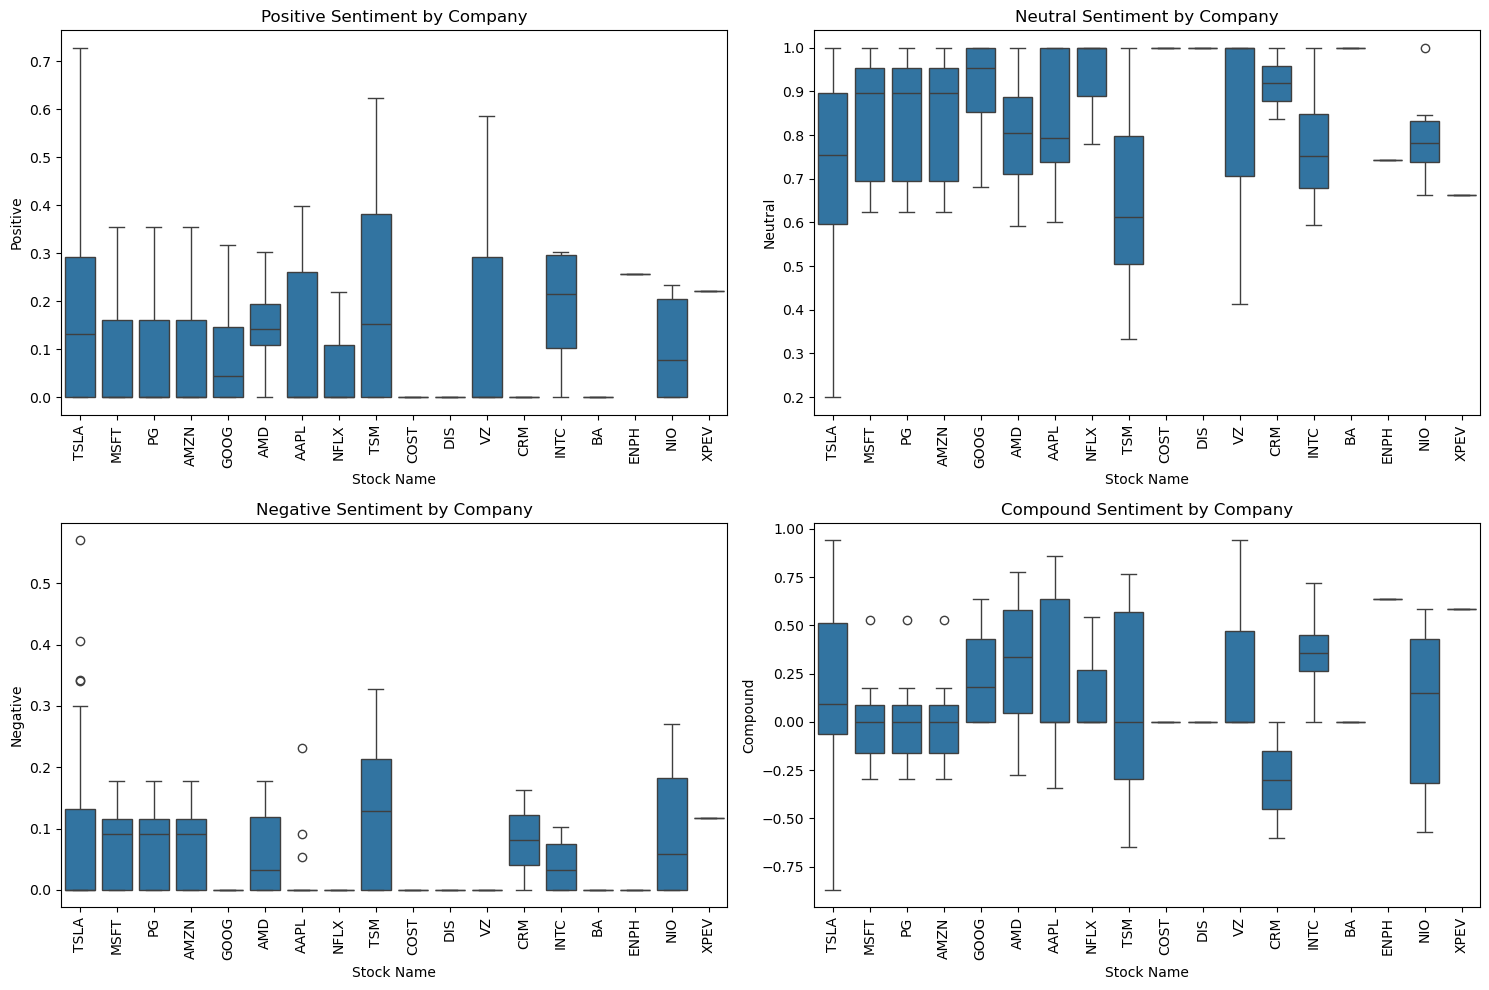

In [75]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Positive', 'Neutral', 'Negative', 'Compound'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Stock Name', y=col, data=data)
    plt.title(f'{col} Sentiment by Company')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

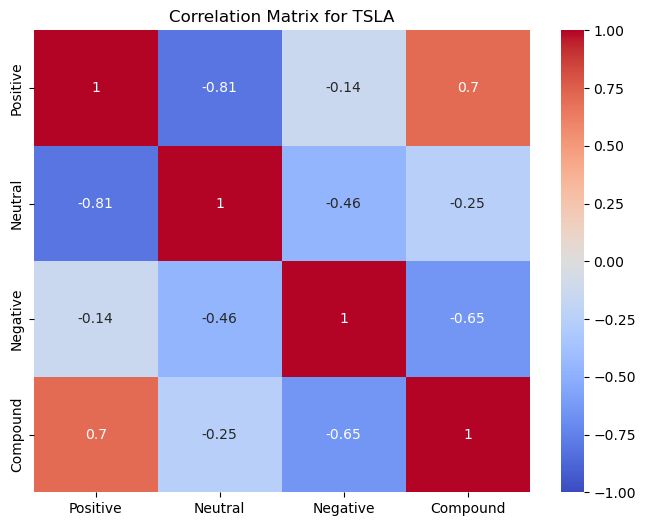

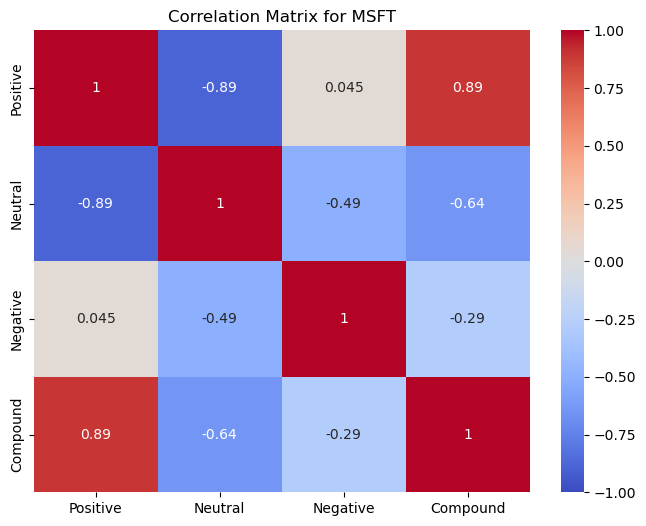

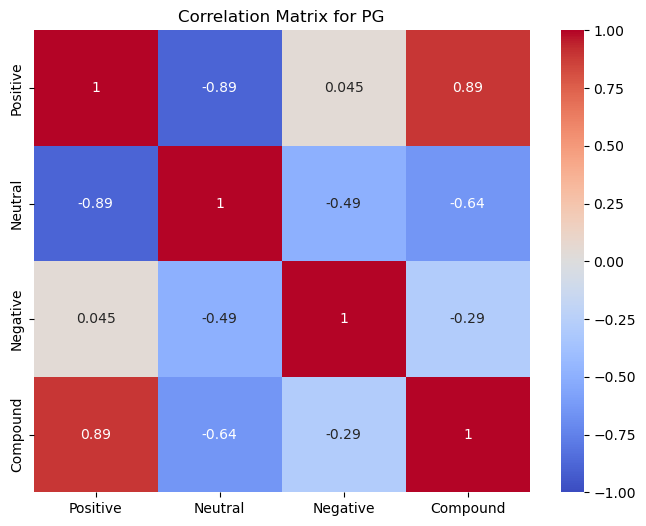

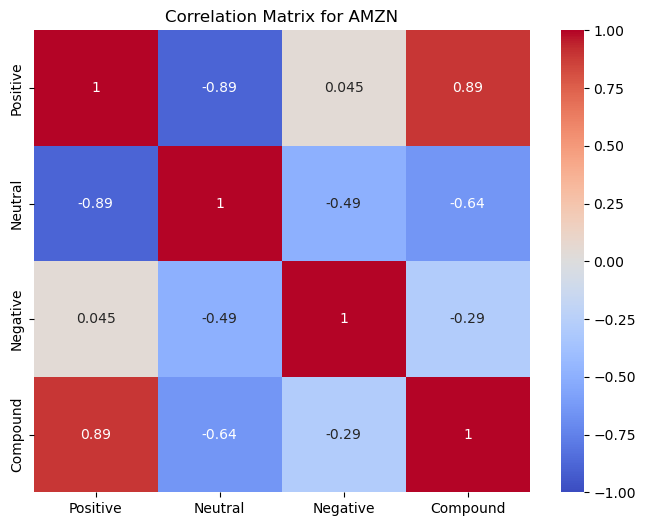

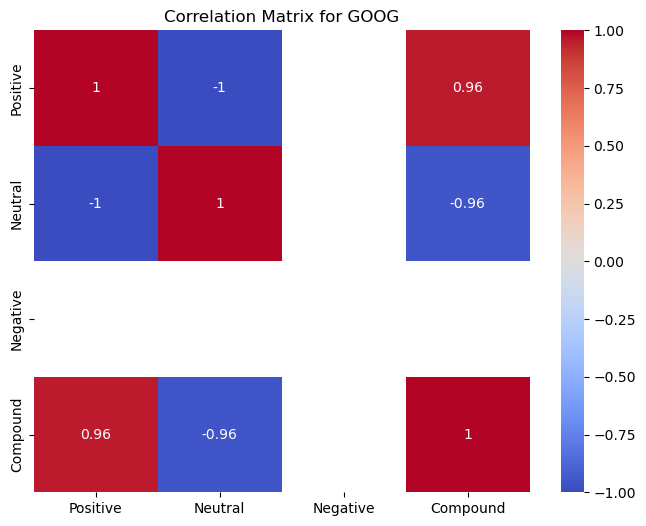

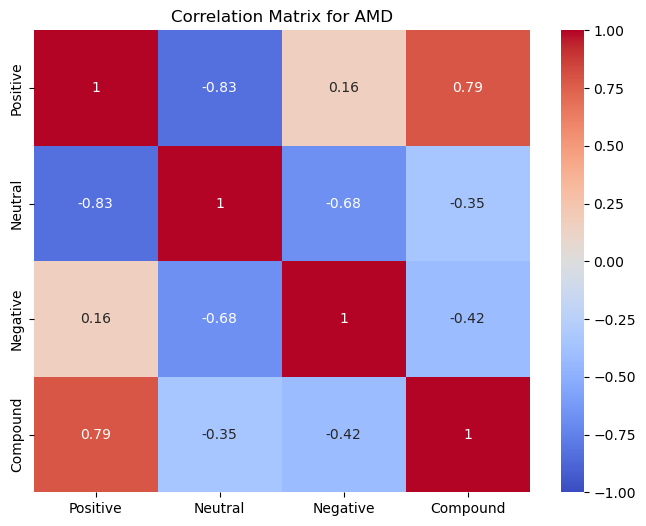

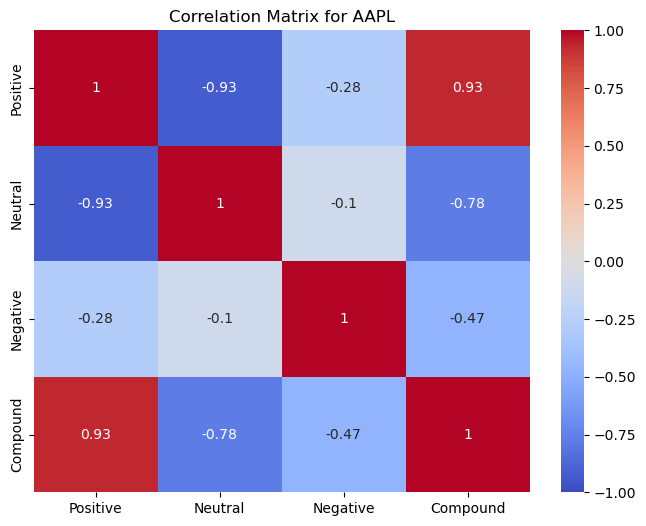

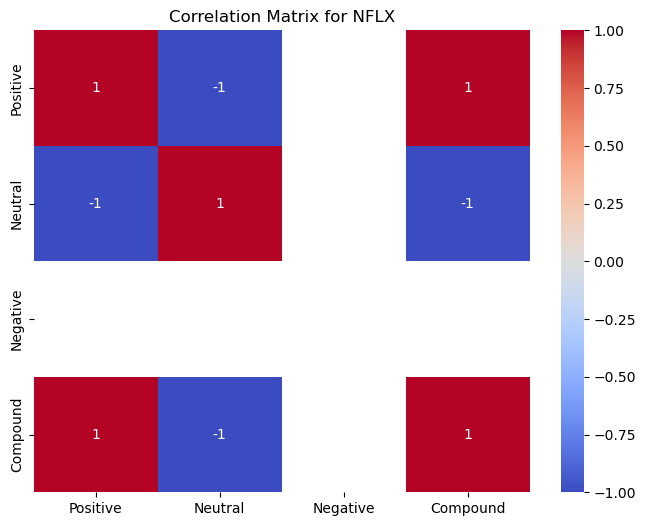

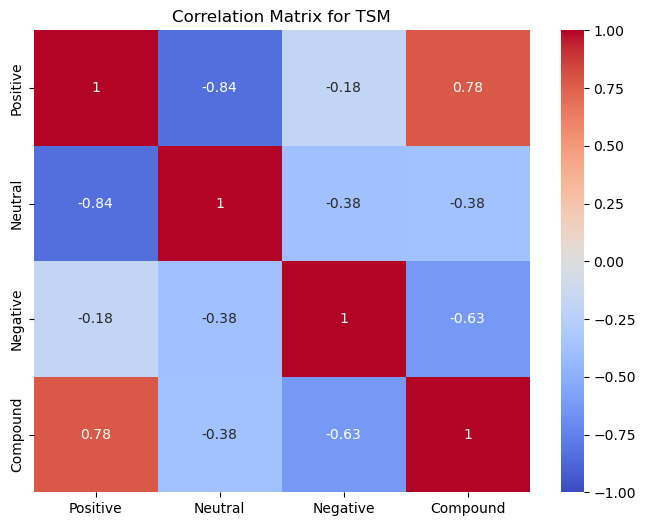

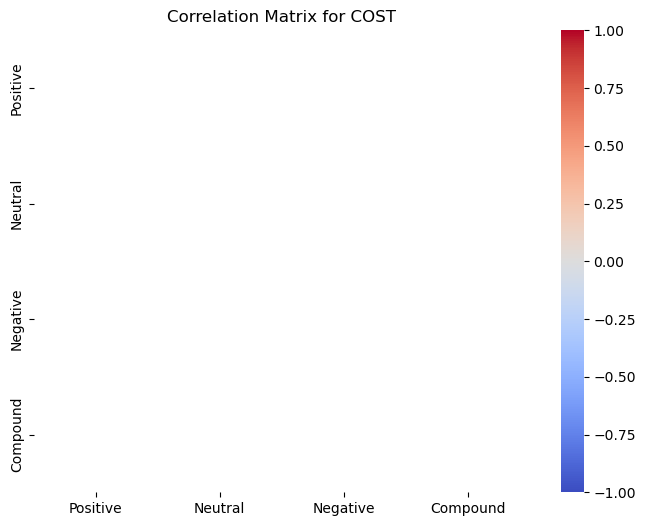

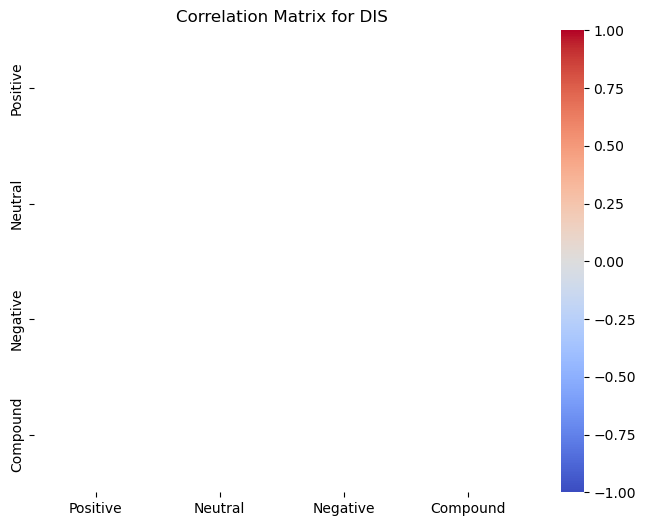

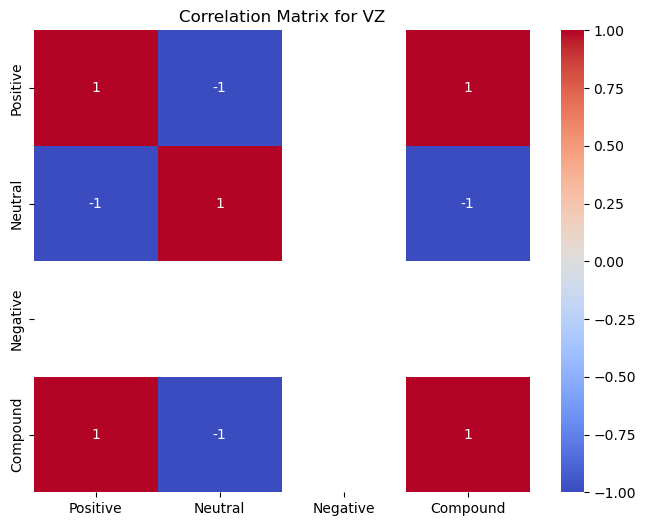

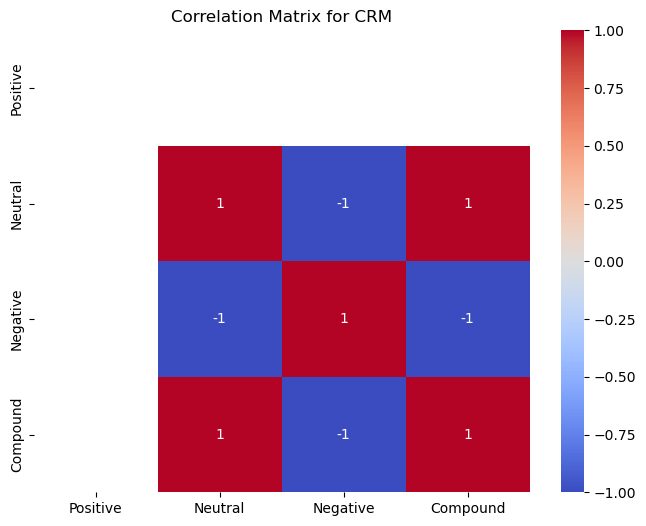

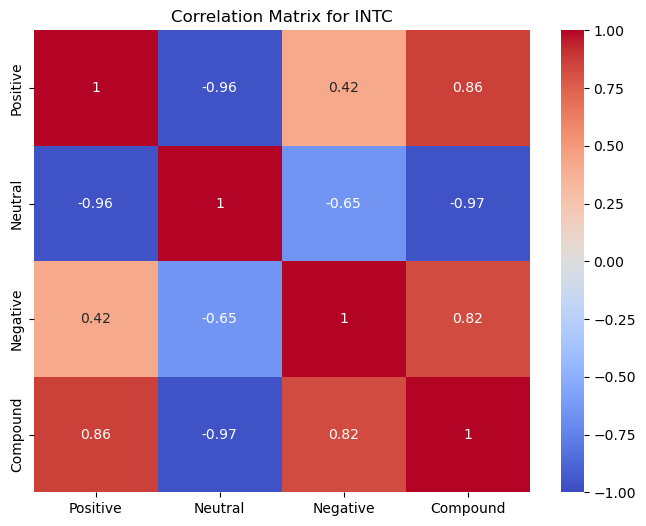

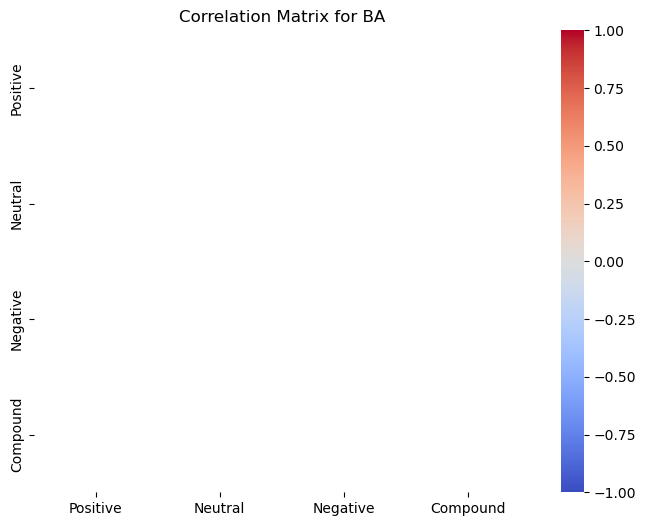

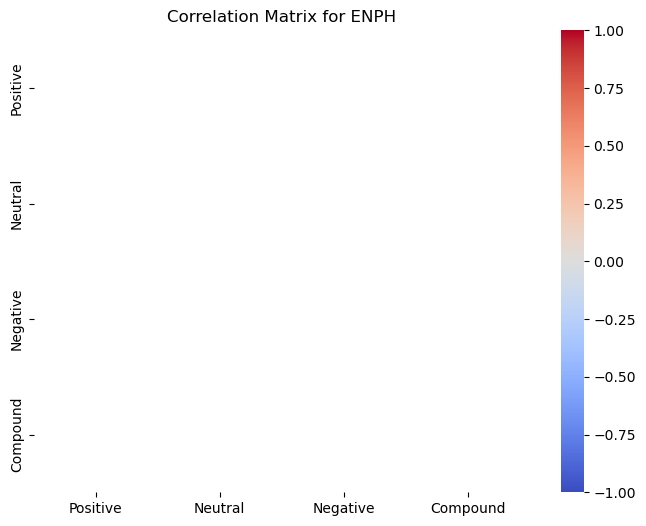

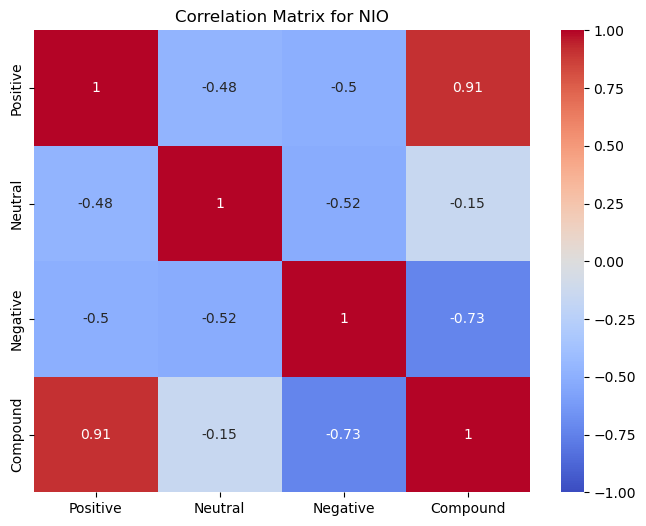

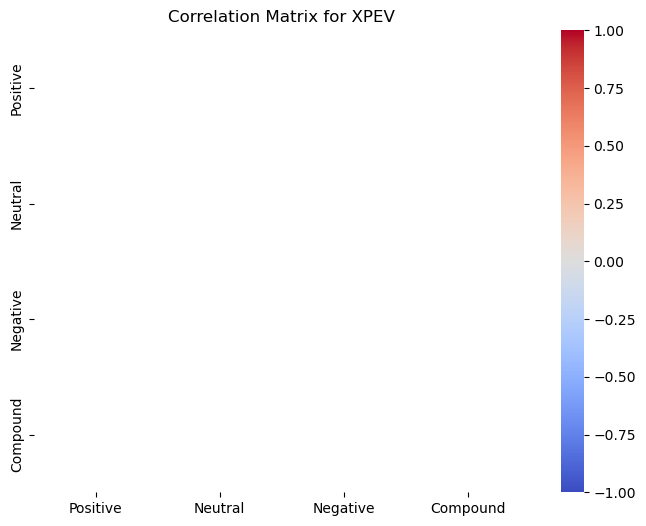

In [79]:
# Step 3: Correlation Between Sentiment Scores and Stock Prices (for each company)
companies = data['Stock Name'].unique()
for company in companies:
    plt.figure(figsize=(8, 6))
    company_data = data[data['Stock Name'] == company]
    sns.heatmap(company_data[[ 'Positive', 'Neutral', 'Negative', 'Compound']].corr(),
                annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {company}')
    plt.show()

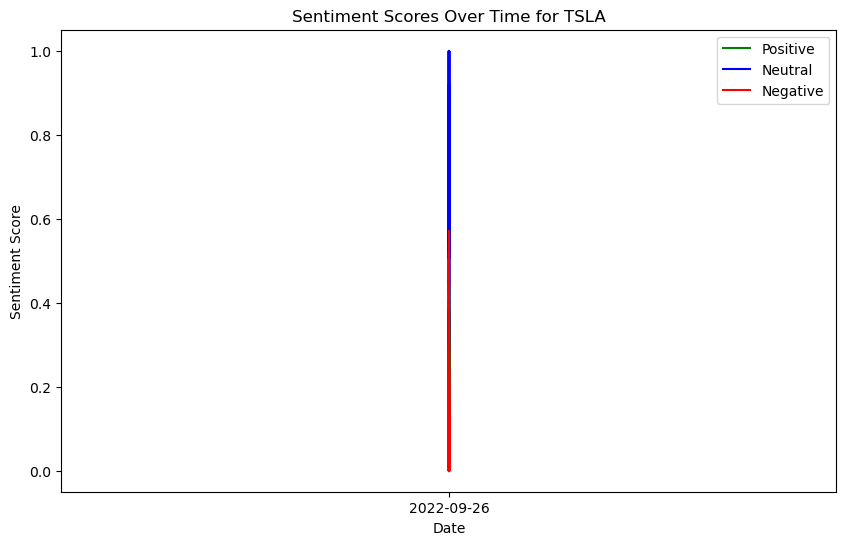

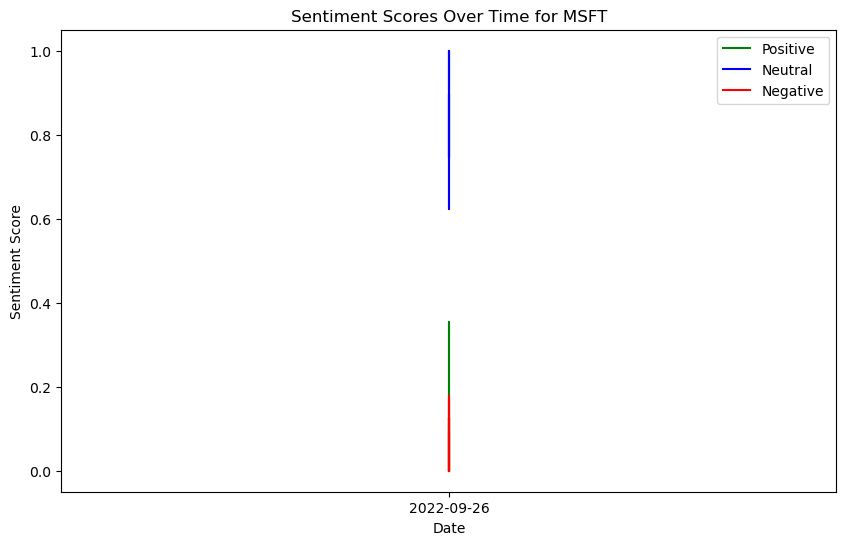

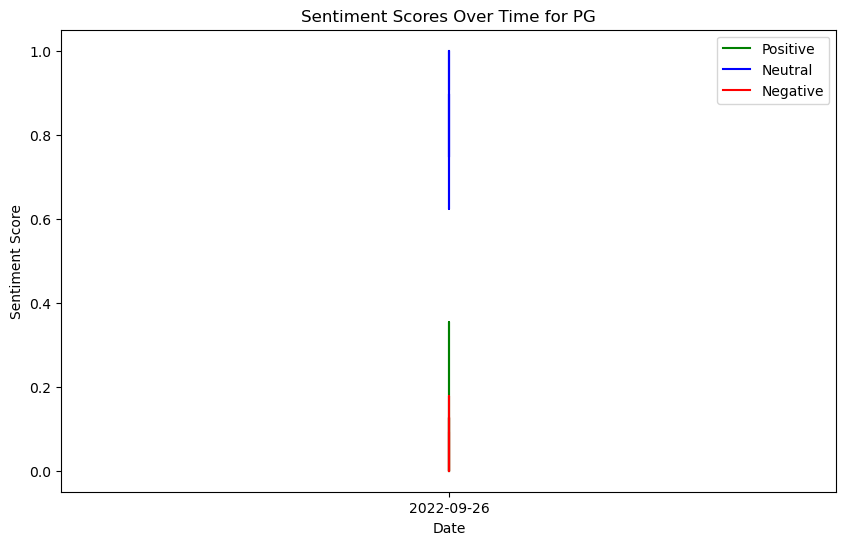

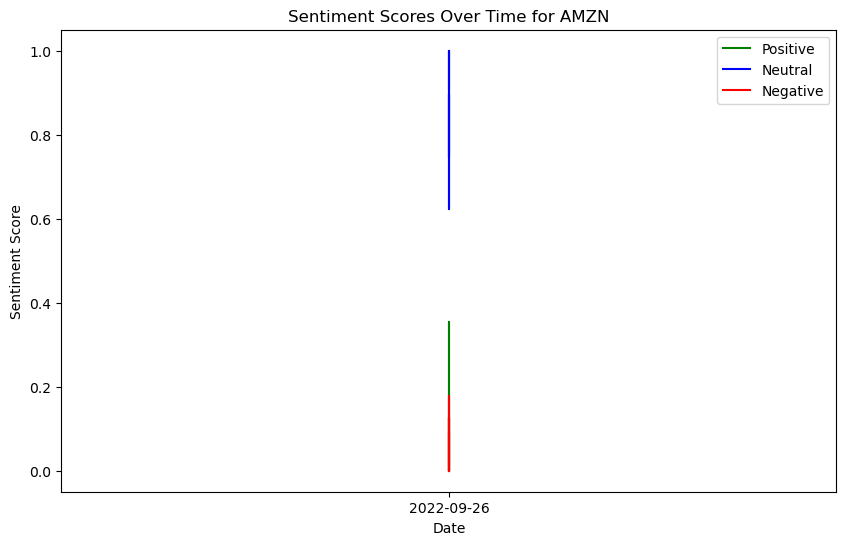

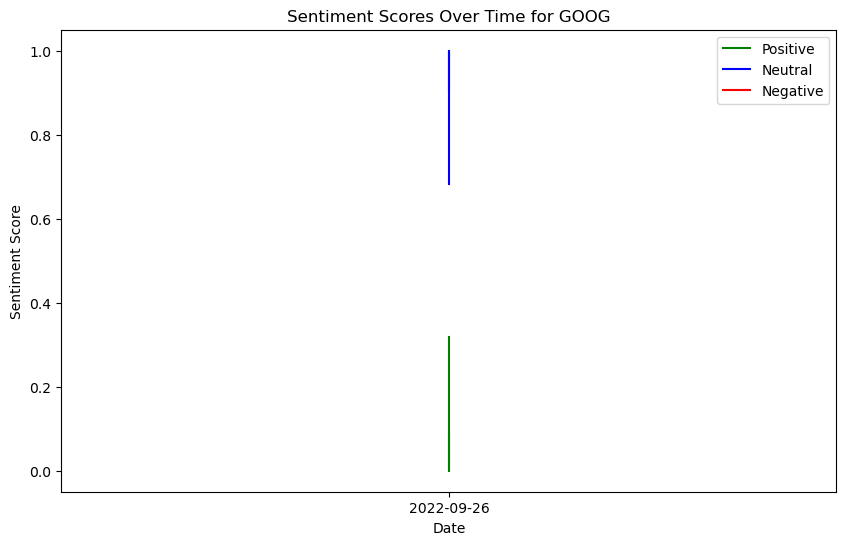

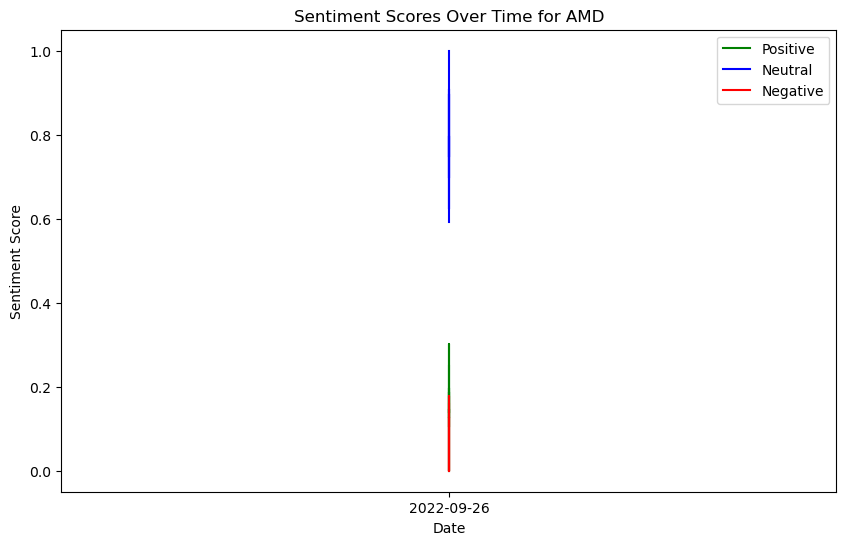

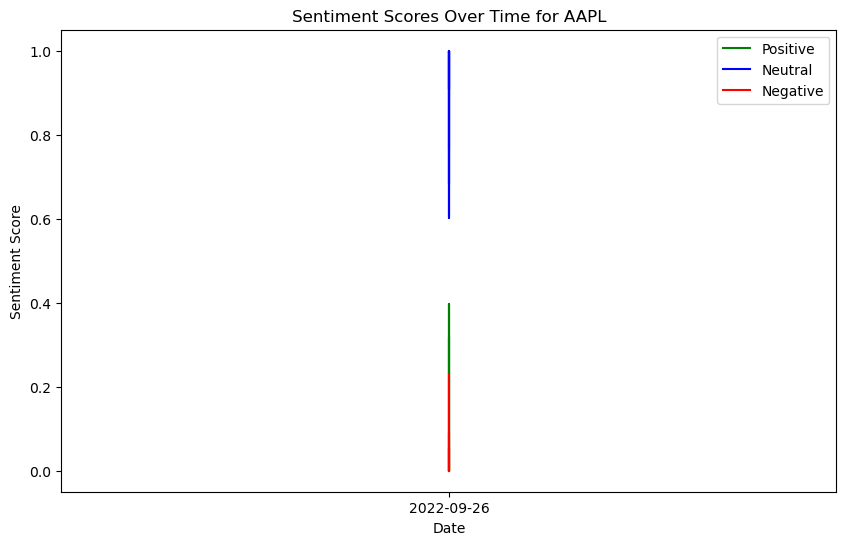

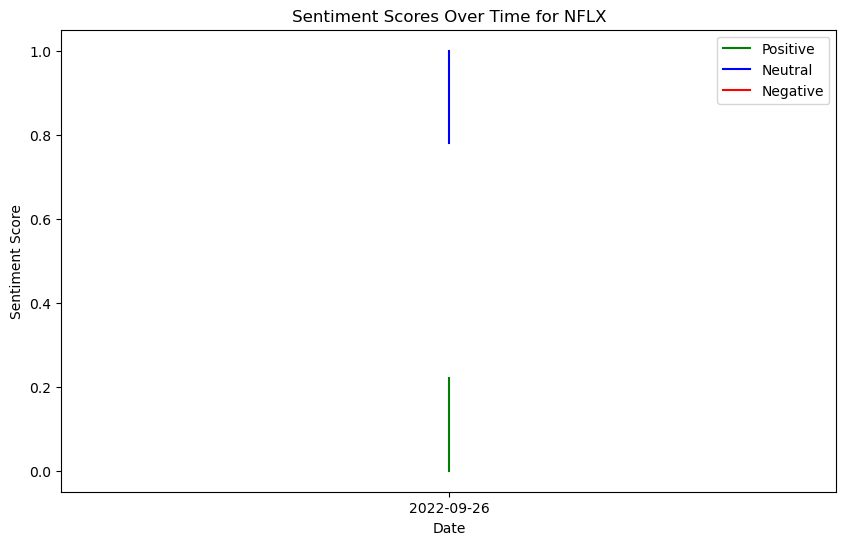

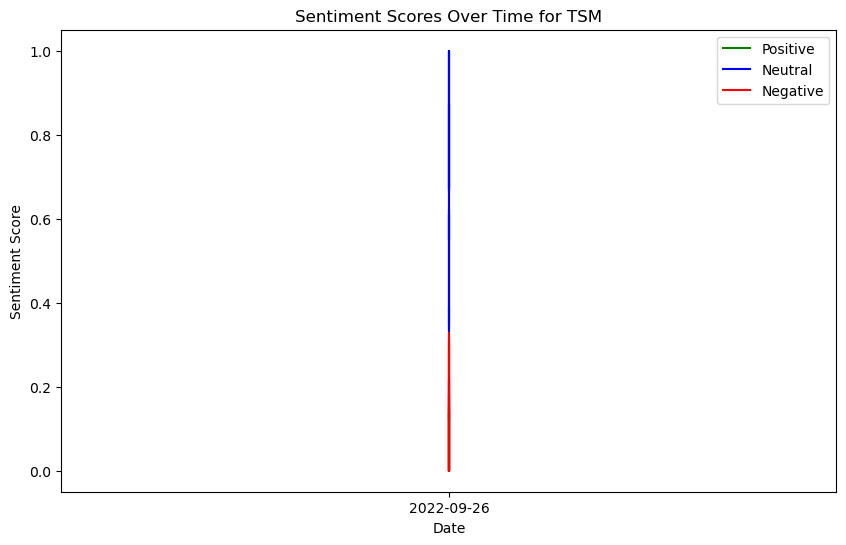

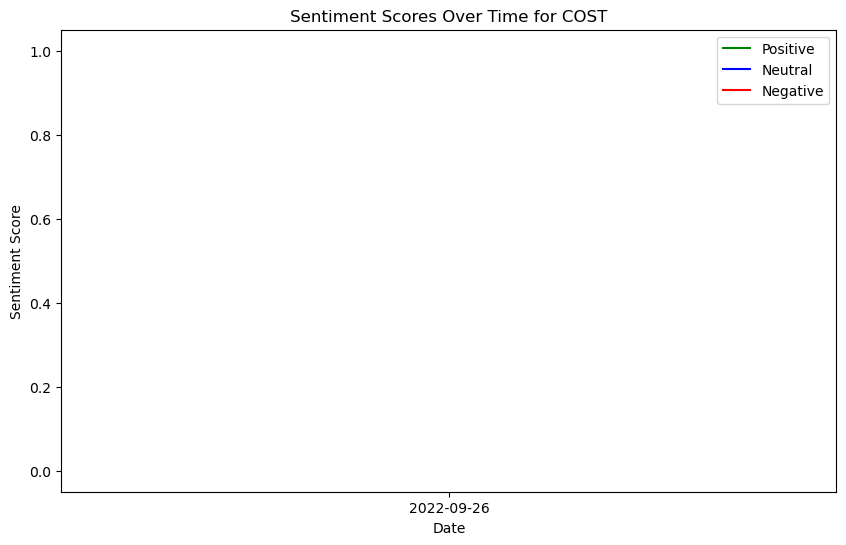

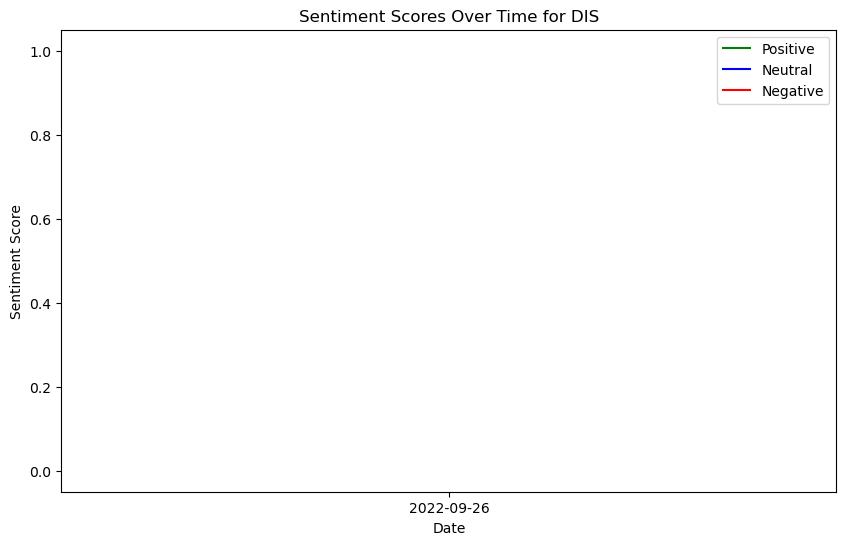

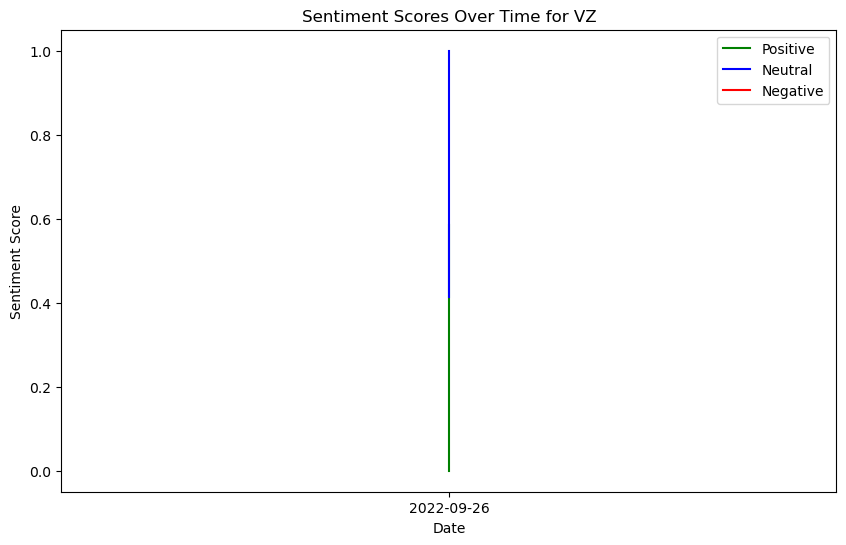

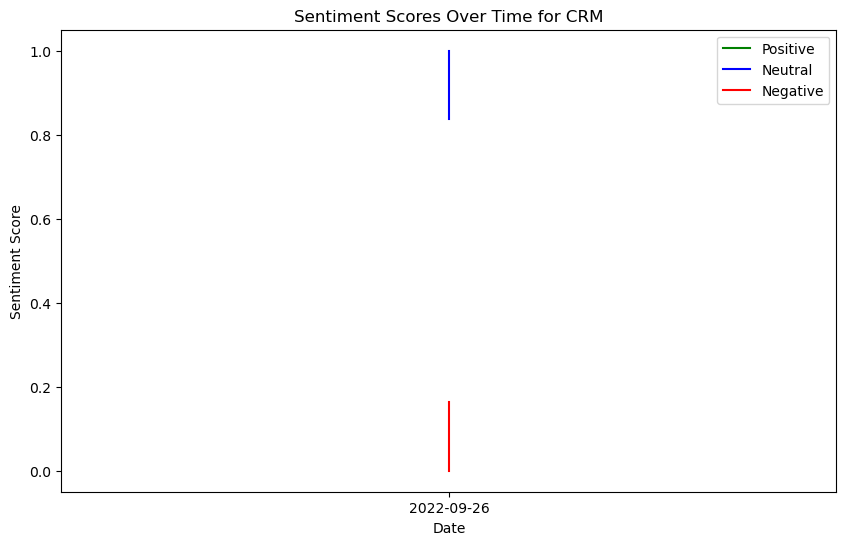

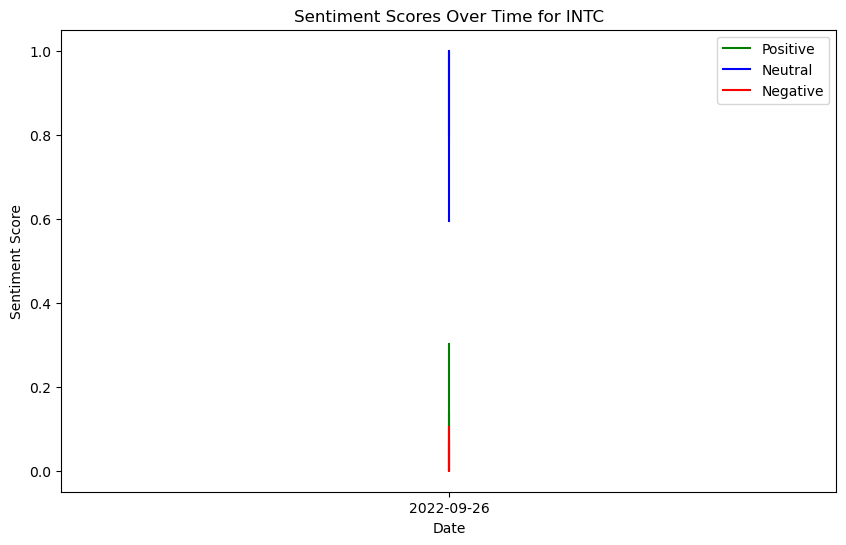

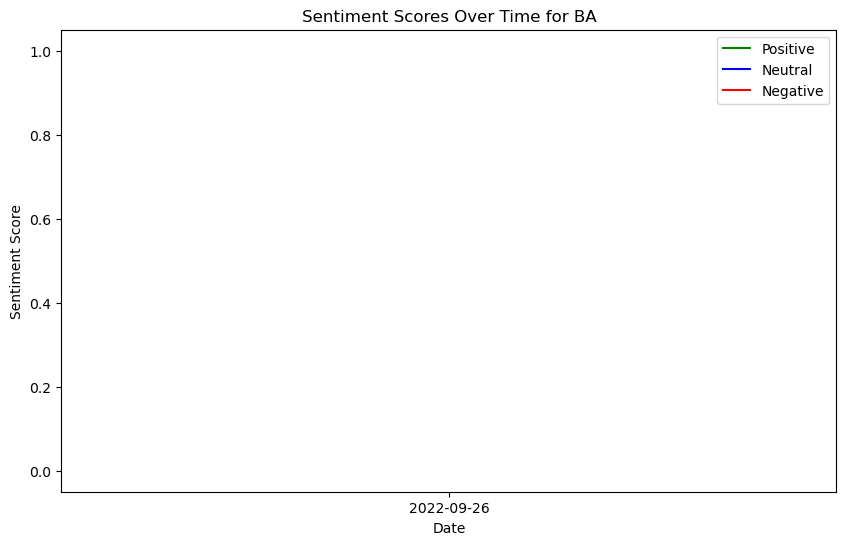

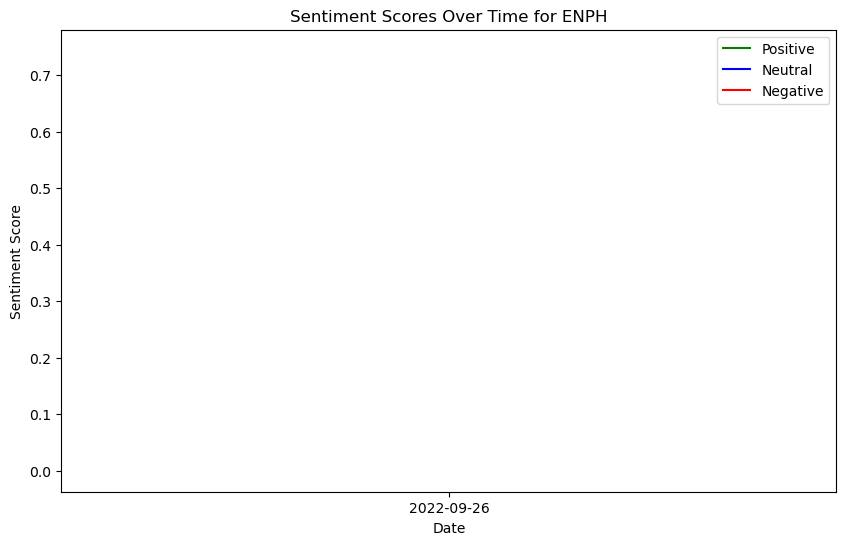

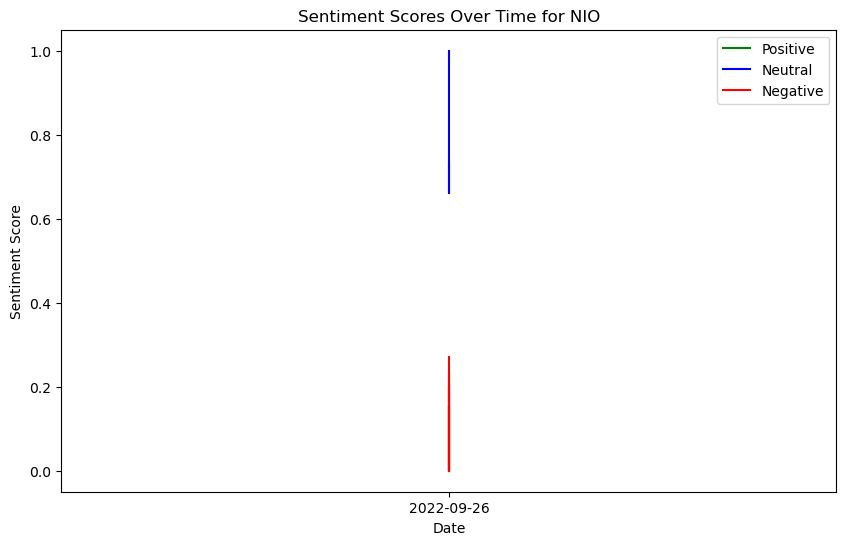

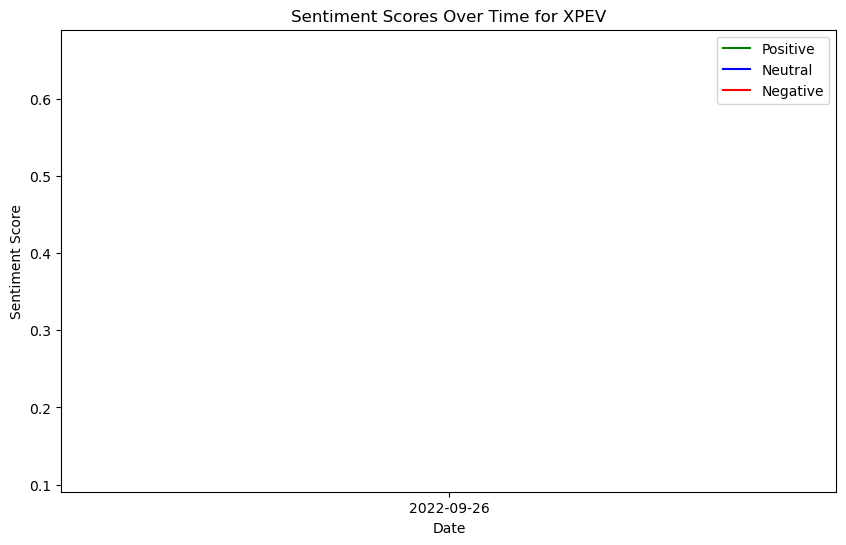

In [81]:
# Step 4: Time Series Sentiment Trend per Company
for company in companies:
    plt.figure(figsize=(10, 6))
    company_data = data[data['Stock Name'] == company]
    plt.plot(company_data['Date'], company_data['Positive'], label='Positive', color='g')
    plt.plot(company_data['Date'], company_data['Neutral'], label='Neutral', color='b')
    plt.plot(company_data['Date'], company_data['Negative'], label='Negative', color='r')
    plt.legend()
    plt.title(f'Sentiment Scores Over Time for {company}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.show()

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the filtered dataset
filtered_df = pd.read_csv('filtered_stock_sentiment_data.csv')

# Step 1: Data Preparation
# Select features (e.g., Sentiment scores and historical stock prices) and the target (e.g., 'Close' price)
X = filtered_df[['Positive', 'Neutral', 'Negative', 'Compound', 'Open', 'High', 'Low', 'Volume']]  # Features
y = filtered_df['Close']  # Target: Predicting 'Close' price

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Step 2: Model Selection and Training
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Step 3: Model Prediction and Evaluation
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the Model
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

# Optionally, display predictions and actual values for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


Mean Squared Error (MSE): 0.0003812051036677788
Mean Absolute Error (MAE): 0.0044160331647694
R-squared (R²): 0.9833787220097161
      Actual  Predicted
57  0.389272   0.389272
88  0.152932   0.153234
67  0.389272   0.389272
74  0.332618   0.332422
38  0.389272   0.389272
